**Import Libraries**

In [1]:

import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

**Read the csv**

In [2]:
df=pd.read_excel("/content/Sample_Longlist_Data.xlsx")
df.head()

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,0,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...
2,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,"1-16 of over 2,000 results",85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,Business Name:nantongaohuanfangzhipinyouxiango...,zhongnanshijicheng27zhuang1410haochongchuanqun...,15,0,25,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
3,2020-11-15,Garden,Seller 4,Seller 4-link,Seller 4-storefrontlink,1-16 of 123 results,NaN,7 days home life supermarket is committed to p...,Business Name:Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,1,0,0,0,0,0,SHIFENG,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
4,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,"1-16 of over 1,000 results",81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,Business Name:shenzhenfeichangshangmeimaoyiyou...,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,16,0,31,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...


**Info about the Dataset**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Date Added                                         1839 non-null   datetime64[ns]
 1   category                                           1839 non-null   object        
 2   sellerlink                                         1839 non-null   object        
 3   sellerlink-url                                     1839 non-null   object        
 4   sellerstorefront-url                               1839 non-null   object        
 5   sellerproductcount                                 1513 non-null   object        
 6   sellerratings                                      1411 non-null   object        
 7   sellerdetails                                      1812 non-null   object        
 8   seller business na

In [4]:
df.shape

(1839, 18)

**There are 1839 rows and 18 columns**

**Parsing column sellerproductcount**

In [5]:
df["sellerproductcount"].value_counts()

1-16 of over 1,000 results     205
1-16 of over 2,000 results     168
1-16 of over 10,000 results    124
1-16 of over 3,000 results     108
1-16 of over 4,000 results      78
                              ... 
1-16 of 618 results              1
1-16 of 802 results              1
1-16 of 614 results              1
1-16 of 987 results              1
1-16 of 105 results              1
Name: sellerproductcount, Length: 394, dtype: int64

In [6]:
df["sellerproductcount"]=df["sellerproductcount"].str.split("[sellerproductcount]",expand=True)[4]

In [7]:
df["sellerproductcount"]=df["sellerproductcount"].str.replace(',', '')

**Parsing column businessaddress**

In [8]:
countries=["US","DE"]
df["businessaddress"]=df["businessaddress"].astype(str)
        
            

In [9]:
address=[]
for i in df["businessaddress"]:
    address.append(i[-2:])

In [10]:

df["businessaddressnew"]=pd.DataFrame(address)

In [11]:

df=df[df.businessaddressnew.isin(countries)]

In [12]:
df["businessaddressnew"].value_counts()

DE    364
US     14
Name: businessaddressnew, dtype: int64

**Considering only the sellers belonging to US and germany**

**Extracting emil-id and phone numbers of the sellers**

In [13]:
df['Email_address']=df['sellerdetails'].str.findall("(?:[a-z0-9!#$%&'*+/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&'*+/=?^_`{|}~-]+)*|'(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21\x23-\x5b\x5d-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])*')@(?:(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?\.)+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?|\[(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?|[a-z0-9-]*[a-z0-9]:(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21-\x5a\x53-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])+)\])")

In [14]:
df["sellerdetails"].iloc[5]

'Blumenbecker Industriebedarf GmbH Sudhoferweg 99-107 59269 Beckum Geschäftsführer: Dipl. Kfm. Richard Mayer, Olaf Lingnau Handelsregister: Amtsgericht Münster HRB 7020 Ust-IdNr: DE 214 670 936 Telefon: 02521/8406-0 E-Mail: bib.beckum@blumenbecker.com   \nDie Europäische Kommission bietet eine Onlineplattform für Streitbeilegung an, die Sie hier finden: https://ec.europa.eu/consumers/odr/\n\nUnter diesem Link finden Sie die Kontaktdaten der offiziellen Streitbeilegungsstellen: https://webgate.ec.europa...'

In [15]:
df["sellerdetails"].str.replace('/(\r\n)+|\r+|\n+|\t+/','')

0       Lohas Living Inc James Mazzello US 845 3RD Ave...
1       Herzlich Willkommen im Amazon Shop von 1a-Hand...
14      Impressum  Gesetzliche Anbieterkennung:  Olive...
19      Impressum: ABC-Schnäppchenmarkt GmbH  Jösser W...
22      Bestof Floral is committed to providing each c...
                              ...                        
1779    Impressum  Gesetzliche Anbieterkennung:  Rolan...
1780    Matthias Löchelt Ruhrstraße 13 59955 Winterber...
1781    Impressum  Gesetzliche Anbieterkennung:  Danie...
1808    Zündholz Riesa is committed to providing each ...
1814    Reinhard Joormann -FansandTrends- e.K.   Im St...
Name: sellerdetails, Length: 378, dtype: object

In [16]:
df["sellerdetails"]=df["sellerdetails"].str.replace("-",'')

In [17]:
df["sellerdetails"]=df["sellerdetails"].str.replace('\n','')

In [18]:
df["sellerdetails"]=df["sellerdetails"].str.replace('/','')

In [19]:
df["sellerdetails"]=df["sellerdetails"].str.replace('|','')

In [20]:
df["sellerdetails"]=df["sellerdetails"].str.replace("(?<=\\d) +(?=\\d)","")

In [21]:
df["phone_number"]=df['sellerdetails'].str.findall(r"(\b\d{10}|d{12}|d{14})")

In [22]:
df['sellerdetails'].iloc[5]

'Blumenbecker Industriebedarf GmbH Sudhoferweg 9910759269 Beckum Geschäftsführer: Dipl. Kfm. Richard Mayer, Olaf Lingnau Handelsregister: Amtsgericht Münster HRB 7020 UstIdNr: DE 214670936 Telefon: 0252184060 EMail: bib.beckum@blumenbecker.com   Die Europäische Kommission bietet eine Onlineplattform für Streitbeilegung an, die Sie hier finden: https:ec.europa.euconsumersodrUnter diesem Link finden Sie die Kontaktdaten der offiziellen Streitbeilegungsstellen: https:webgate.ec.europa...'

In [23]:
df["phone_number"].iloc[5]

['9910759269', '0252184060']

**Extracting the positive ratings into the column no of ratings**

In [24]:
df["%_positive_ratings"]=df["sellerratings"].str.split("%",expand=True)[0]

In [25]:
df["no_of_ratings"]=df["sellerratings"].str.split("(",expand=True)[1]

In [26]:
df["no_of_ratings"]=df["no_of_ratings"].str.extract("([0-9]+)")

In [27]:
df["no_of_ratings"]

0        118
1        566
14       116
19      3721
22        10
        ... 
1779      34
1780     631
1781     196
1808      16
1814    3075
Name: no_of_ratings, Length: 378, dtype: object

In [28]:
df.head()

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL,businessaddressnew,Email_address,phone_number,%_positive_ratings,no_of_ratings
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,100000,88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 8453RD Ave ...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,US,[jadgemaello@gmail.com],"[1208964680, 1208964680]",88,118
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1aHande...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,0,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...,DE,"[info@1a-handelsagentur.de, info@1a-handelsage...","[0399328297, 0399328297]",90,566
14,2020-11-15,Garden,Seller 15,Seller 15-link,Seller 15-storefrontlink,,97% positive in the last 12 months (116 ratings),Impressum Gesetzliche Anbieterkennung: Olive...,Business Name:Oliver Mills,Kaiserstr.12Borgholzhausen33829DE,15,0,0,3,1446,921,Unbekannt,https://www.amazon.de/-/en/Unbekannt/b/ref=bl_...,DE,[webmaster@9pm-store.de],[0151400085],97,116
19,2020-11-15,Garden,Seller 20,Seller 20-link,Seller 20-storefrontlink,NaN,76% positive in the last 12 months (3721 ratings),Impressum: ABCSchnäppchenmarkt GmbH Jösser We...,Business Name:ABC-Schnäppchenmarkt GmbH,Jösser Weg10Petershagen32469DE,0,18,20,20,0,0,Visit the TFA Dostmann Store,https://www.amazon.de/-/en/stores/TFA+Dostmann...,DE,[abc-markt@web.de],"[0570591155, 0570591156]",76,3721
22,2020-11-15,Garden,Seller 23,Seller 23-link,Seller 23-storefrontlink,40000,100% positive in the last 12 months (10 ratings),Bestof Floral is committed to providing each c...,Business Name:MADEWELL SUPPLY INC,90 BROAD ST 2ND FLOORNEW YORKNY10004-2205US,16,0,0,0,10538,8293,Visit the Seville Classics Store,https://www.amazon.de/-/en/stores/Seville+Clas...,US,[],[],100,10


**Taking only the required columns for our analysis**

In [29]:
df1=df[["sellerproductcount","sellerlink","no_of_ratings","Hero Product 1 #ratings","Hero Product 2 #ratings","Sample brand name","businessaddressnew","Email_address","phone_number","%_positive_ratings"]]

In [30]:
df1.head()

,sellerproductcount,sellerlink,no_of_ratings,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,businessaddressnew,Email_address,phone_number,%_positive_ratings
0,100000,Seller 1,118,5873,4957,Visit the YAMAZAKI Store,US,[jadgemaello@gmail.com],"[1208964680, 1208964680]",88
1,NaN,Seller 2,566,0,0,Visit the tesa Store,DE,"[info@1a-handelsagentur.de, info@1a-handelsage...","[0399328297, 0399328297]",90
14,,Seller 15,116,1446,921,Unbekannt,DE,[webmaster@9pm-store.de],[0151400085],97
19,NaN,Seller 20,3721,0,0,Visit the TFA Dostmann Store,DE,[abc-markt@web.de],"[0570591155, 0570591156]",76
22,40000,Seller 23,10,10538,8293,Visit the Seville Classics Store,US,[],[],100


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 0 to 1814
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   sellerproductcount       316 non-null    object
 1   sellerlink               378 non-null    object
 2   no_of_ratings            376 non-null    object
 3   Hero Product 1 #ratings  378 non-null    int64 
 4   Hero Product 2 #ratings  378 non-null    int64 
 5   Sample brand name        378 non-null    object
 6   businessaddressnew       378 non-null    object
 7   Email_address            376 non-null    object
 8   phone_number             376 non-null    object
 9   %_positive_ratings       376 non-null    object
dtypes: int64(2), object(8)
memory usage: 32.5+ KB


**Checking for null values**

In [32]:
df1.isnull().sum()

sellerproductcount         62
sellerlink                  0
no_of_ratings               2
Hero Product 1 #ratings     0
Hero Product 2 #ratings     0
Sample brand name           0
businessaddressnew          0
Email_address               2
phone_number                2
%_positive_ratings          2
dtype: int64

**There are 62 null values in the column sellerproductcount and 2 in column no_of_ratings,2 in email_address,2 in phone_number,2 in %_positive_ratings columns**

In [33]:
df1["sellerproductcount"].isnull().sum()

62

In [34]:
df1["sellerproductcount"]=pd.to_numeric(df1['sellerproductcount'], errors='coerce')

**Filling the null values in sellerproductcount column with the median values**

In [35]:
df1["sellerproductcount"].fillna(df1["sellerproductcount"].median(),inplace=True)
df1["no_of_ratings"].fillna(df1["no_of_ratings"].median(), inplace=True)
df1["%_positive_ratings"].fillna(df1["%_positive_ratings"].median(), inplace=True)
df1["Email_address"].fillna("not_available", inplace=True)
df1["phone_number"].fillna("not_available", inplace=True)

**Dropping the other null values as they are less than 30% using dropna**

In [36]:
med1=df1["sellerproductcount"].median()

In [37]:
df1.isnull().sum()

sellerproductcount         0
sellerlink                 0
no_of_ratings              0
Hero Product 1 #ratings    0
Hero Product 2 #ratings    0
Sample brand name          0
businessaddressnew         0
Email_address              0
phone_number               0
%_positive_ratings         0
dtype: int64

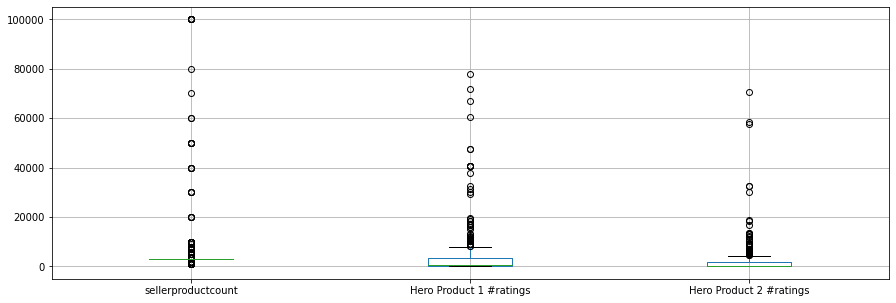

In [38]:
plt.figure(figsize=(15,5))
df1.boxplot()
plt.show()

**There are outliers in the dataset**

In [39]:
# Q1 = df1.quantile(0.25)
# Q3 = df1.quantile(0.75)
# IQR = Q3 - Q1
# df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
# df1.shape

****

In [40]:
df1["no_of_ratings"]=pd.to_numeric(df1['no_of_ratings'], errors='coerce')

df1["%_positive_ratings"]=pd.to_numeric(df1['%_positive_ratings'], errors='coerce')


In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 0 to 1814
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sellerproductcount       378 non-null    float64
 1   sellerlink               378 non-null    object 
 2   no_of_ratings            378 non-null    float64
 3   Hero Product 1 #ratings  378 non-null    int64  
 4   Hero Product 2 #ratings  378 non-null    int64  
 5   Sample brand name        378 non-null    object 
 6   businessaddressnew       378 non-null    object 
 7   Email_address            378 non-null    object 
 8   phone_number             378 non-null    object 
 9   %_positive_ratings       378 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 32.5+ KB


In [42]:
df1.describe()

,sellerproductcount,no_of_ratings,Hero Product 1 #ratings,Hero Product 2 #ratings,%_positive_ratings
count,378.000000,378.000000,378.000000,378.000000,378.000000
mean,6804.232804,615.386243,4156.732804,2339.899471,93.642857
std,15399.844399,2158.108113,10027.472378,6735.508463,7.300809
min,1000.000000,1.000000,0.000000,0.000000,25.000000
25%,3000.000000,47.000000,44.500000,23.500000,92.000000
50%,3000.000000,154.500000,716.000000,321.000000,96.000000
75%,3000.000000,445.500000,3260.500000,1789.500000,98.000000
max,100000.000000,37124.000000,77714.000000,70732.000000,100.000000


**The average number of ratings is 620 and the average ratings given for hero product 1 is 4191 and the average ratings for product 2
is 2359 the average % of positive ratings given is 93%**

**UNIVARIATE ANALYSIS**

In [43]:
df1["businessaddressnew"].unique()

array(['US', 'DE'], dtype=object)

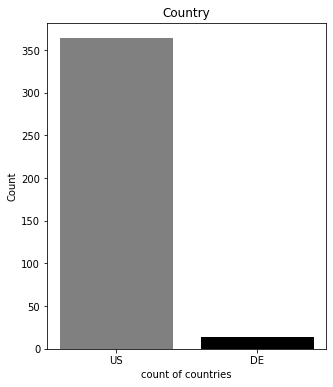

In [44]:

plt.figure(figsize=(5,6))
plt.bar(['US','DE'],df1.businessaddressnew.value_counts(),width=0.8,color=['gray', 'black'])
plt.xlabel('count of countries')
plt.ylabel('Count')
plt.title('Country')
plt.show()

**The sellers mostly belong to US and about 30 sellers belong to Germany**

In [45]:
df1.columns

Index(['sellerproductcount', 'sellerlink', 'no_of_ratings',
       'Hero Product 1 #ratings', 'Hero Product 2 #ratings',
       'Sample brand name', 'businessaddressnew', 'Email_address',
       'phone_number', '%_positive_ratings'],
      dtype='object')

**Bivariate and Multivariate Analysis**

**Top 10 sellers with highest number of ratings**

In [46]:

popularity_table=df1.groupby('sellerlink').agg({'%_positive_ratings':'mean','no_of_ratings':'mean'})

In [47]:
top_popularity_table=popularity_table[popularity_table['no_of_ratings']>100]

In [48]:
#The top 10 sellers with maximum ratings 
z=top_popularity_table.sort_values('no_of_ratings',ascending=False).head(10)


In [49]:
z

,%_positive_ratings,no_of_ratings
sellerlink,,
Seller 487,95.0,37124.0
Seller 497,90.0,8063.0
Seller 727,89.0,7242.0
Seller 475,96.0,6204.0
Seller 883,94.0,6086.0
Seller 753,95.0,5826.0
Seller 37,91.0,5150.0
Seller 558,94.0,4919.0
Seller 900,96.0,4204.0


**The seller 487 got the highest number of ratings for his products with 95% of positive ratings**

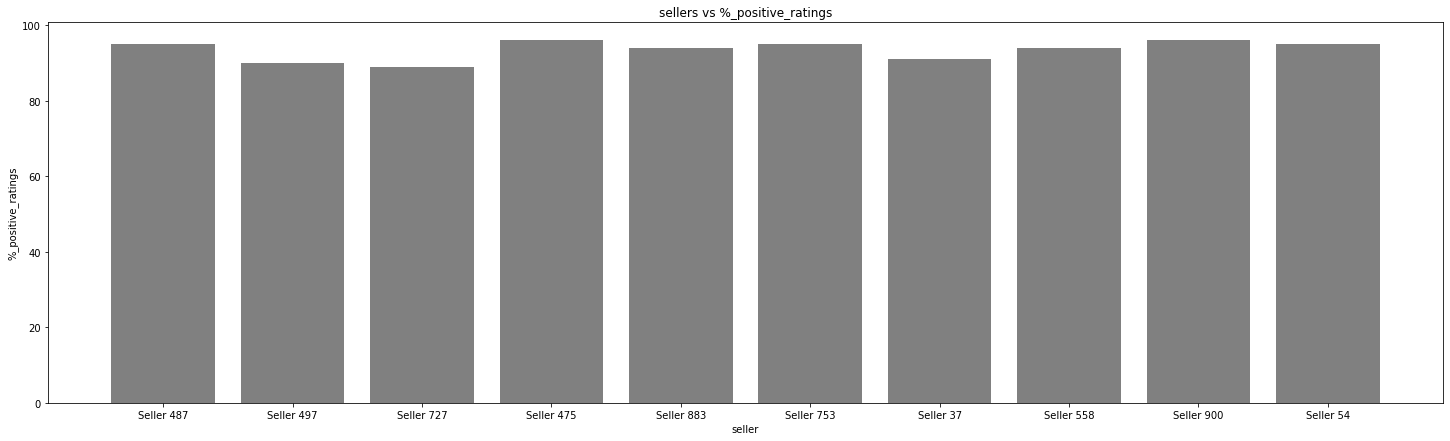

In [50]:
plt.figure(figsize=(25,7))
plt.bar(z.index,z["%_positive_ratings"],color='gray')
plt.xlabel('seller')
plt.ylabel('%_positive_ratings')
plt.title('sellers vs %_positive_ratings')
plt.show()

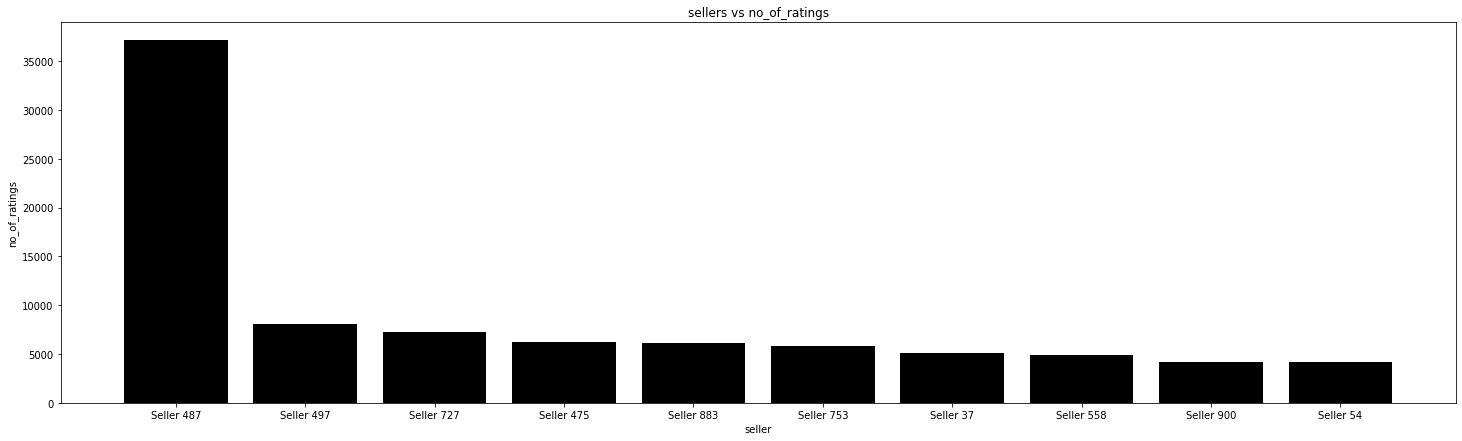

In [51]:
plt.figure(figsize=(25,7))
plt.bar(z.index,z["no_of_ratings"],color="black")
plt.xlabel('seller')
plt.ylabel('no_of_ratings')
plt.title('sellers vs no_of_ratings')
plt.show()

In [52]:
df1.columns

Index(['sellerproductcount', 'sellerlink', 'no_of_ratings',
       'Hero Product 1 #ratings', 'Hero Product 2 #ratings',
       'Sample brand name', 'businessaddressnew', 'Email_address',
       'phone_number', '%_positive_ratings'],
      dtype='object')

**Top 10 sellers who has the highest number of ratings for hero product 1**

In [53]:

popularity_table=df1.groupby('sellerlink').agg({'%_positive_ratings':'mean','no_of_ratings':'mean',"Hero Product 1 #ratings":"mean"})

In [54]:
top_popularity_table=popularity_table[popularity_table['Hero Product 1 #ratings']>1000]

In [55]:
y=top_popularity_table.sort_values('Hero Product 1 #ratings',ascending=False).head(10)

In [56]:
y

,%_positive_ratings,no_of_ratings,Hero Product 1 #ratings
sellerlink,,,
Seller 496,91.0,288.0,77714
Seller 323,92.0,699.0,71673
Seller 883,94.0,6086.0,66776
Seller 322,94.0,196.0,60384
Seller 1059,92.0,578.0,47340
Seller 101,97.0,3416.0,47337
Seller 986,94.0,363.0,40684
Seller 38,93.0,120.0,40684
Seller 54,95.0,4189.0,40684


**seller 496 has the highest number of ratings for hero product 1 where 92% of the ratings are positive out of 288 ratings**

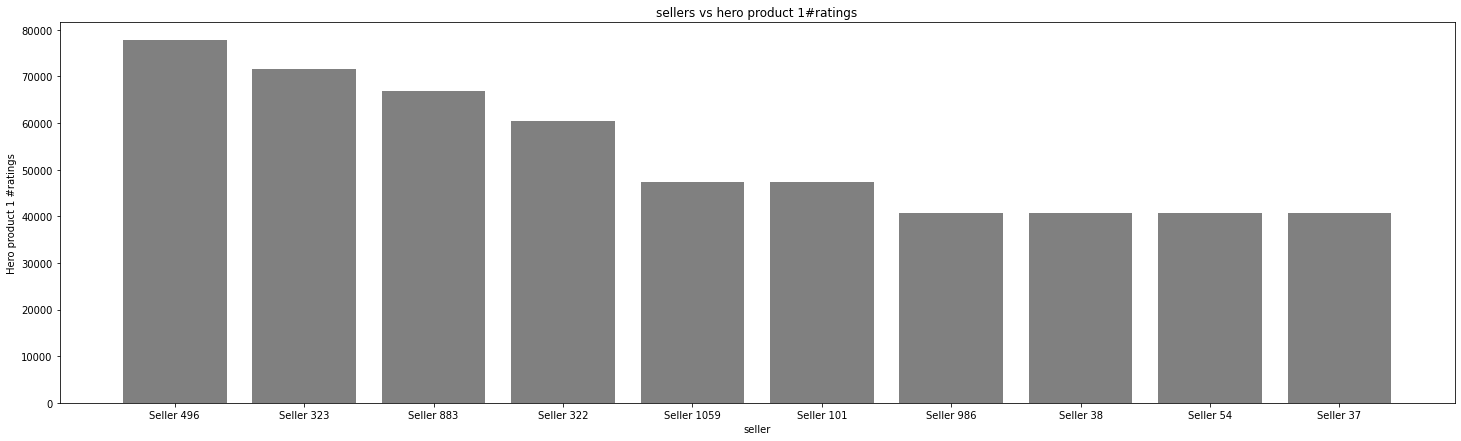

In [57]:
plt.figure(figsize=(25,7))
plt.bar(y.index,y["Hero Product 1 #ratings"],color="gray")
plt.xlabel('seller')
plt.ylabel('Hero product 1 #ratings')
plt.title('sellers vs hero product 1#ratings')
plt.show()

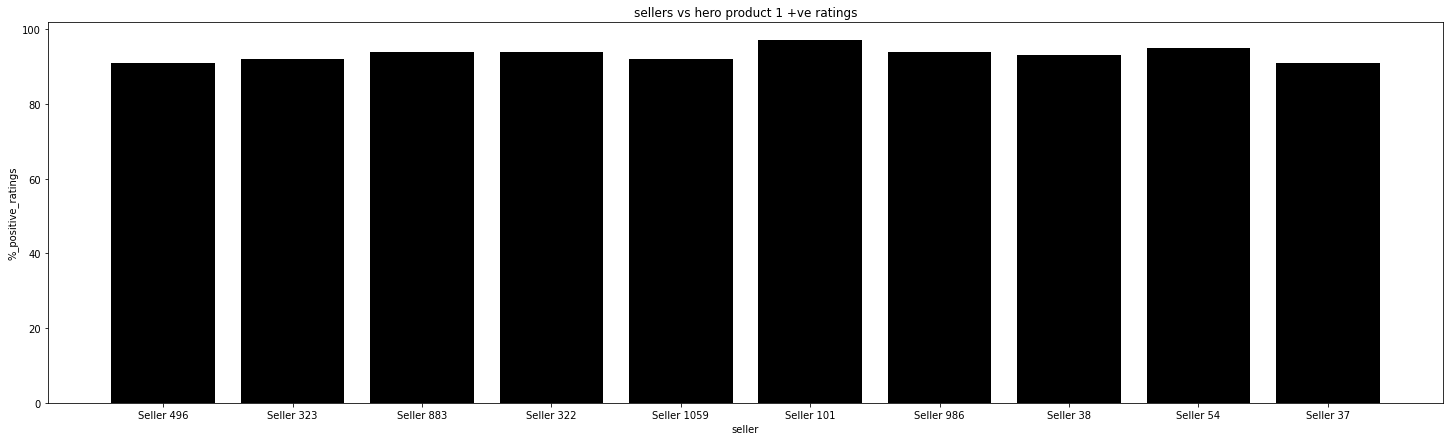

In [58]:
plt.figure(figsize=(25,7))
plt.bar(y.index,y["%_positive_ratings"],color="black")
plt.xlabel('seller')
plt.ylabel('%_positive_ratings')
plt.title('sellers vs hero product 1 +ve ratings')
plt.show()

**Top 10 sellers with highest number of ratings for hero product 2**

In [59]:

popularity_table=df1.groupby('sellerlink').agg({'%_positive_ratings':'mean','no_of_ratings':'mean',"Hero Product 2 #ratings":"mean"})

In [60]:
top_popularity_table=popularity_table[popularity_table['Hero Product 2 #ratings']>1000]

In [61]:
x=top_popularity_table.sort_values('Hero Product 2 #ratings',ascending=False).head(10)

In [62]:
x

,%_positive_ratings,no_of_ratings,Hero Product 2 #ratings
sellerlink,,,
Seller 496,91.0,288.0,70732
Seller 323,92.0,699.0,58332
Seller 322,94.0,196.0,57769
Seller 883,94.0,6086.0,32420
Seller 101,97.0,3416.0,32420
Seller 838,80.0,415.0,30140
Seller 37,91.0,5150.0,18910
Seller 1059,92.0,578.0,18561
Seller 657,96.0,77.0,16960


**Again seller 496 has the highest number of ratings for hero product 2 where 91% of the ratings are positive**

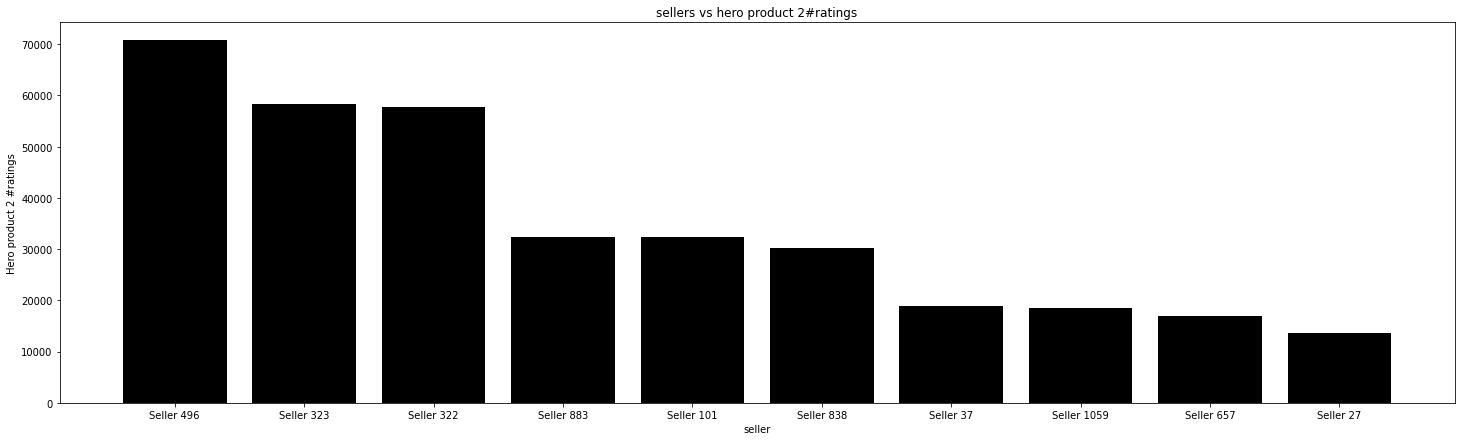

In [63]:
plt.figure(figsize=(25,7))
plt.bar(x.index,x["Hero Product 2 #ratings"],color="black")
plt.xlabel('seller')
plt.ylabel('Hero product 2 #ratings')
plt.title('sellers vs hero product 2#ratings')
plt.show()

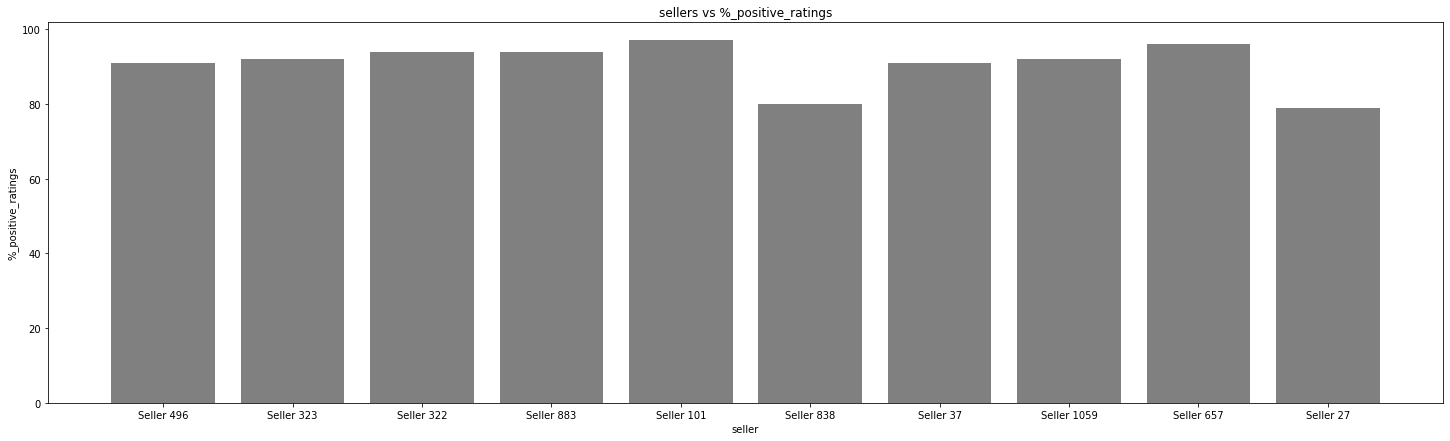

In [64]:
plt.figure(figsize=(25,7))
plt.bar(x.index,x["%_positive_ratings"],color="gray")
plt.xlabel('seller')
plt.ylabel('%_positive_ratings')
plt.title('sellers vs %_positive_ratings')
plt.show()

In [65]:
df1.columns

Index(['sellerproductcount', 'sellerlink', 'no_of_ratings',
       'Hero Product 1 #ratings', 'Hero Product 2 #ratings',
       'Sample brand name', 'businessaddressnew', 'Email_address',
       'phone_number', '%_positive_ratings'],
      dtype='object')

**Top 10 sellers with highest number of sellerproductcount**

In [66]:
popularity_table=df1.groupby('sellerlink').agg({'sellerproductcount':'mean'})

In [67]:
prod_cnt=popularity_table.sort_values('sellerproductcount',ascending=False).head(10)

In [68]:
prod_cnt

,sellerproductcount
sellerlink,
Seller 1,100000.0
Seller 986,100000.0
Seller 186,100000.0
Seller 34,100000.0
Seller 24,100000.0
Seller 496,100000.0
Seller 32,80000.0
Seller 277,70000.0
Seller 108,60000.0


**About 1 lakh products are sold by seller 1**

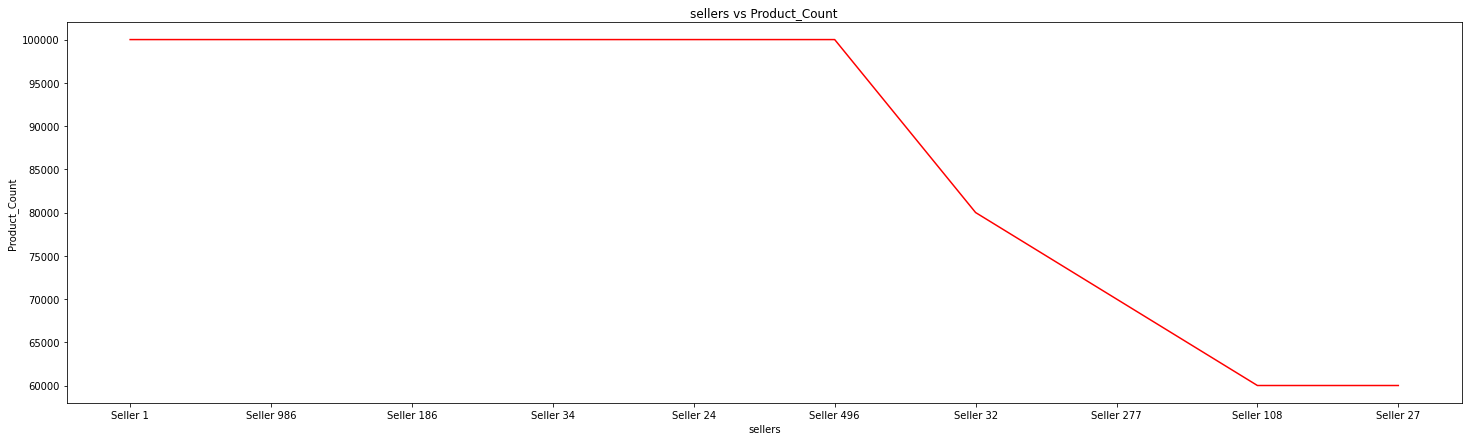

In [69]:
plt.figure(figsize=(25,7))
plt.plot(prod_cnt,color="red")
plt.xlabel('sellers')
plt.ylabel('Product_Count')
plt.title('sellers vs Product_Count')
plt.show()


In [70]:
df1.columns

Index(['sellerproductcount', 'sellerlink', 'no_of_ratings',
       'Hero Product 1 #ratings', 'Hero Product 2 #ratings',
       'Sample brand name', 'businessaddressnew', 'Email_address',
       'phone_number', '%_positive_ratings'],
      dtype='object')

**Details of the top 10 sellers who have the highest ratings for hero product 1**

In [71]:
popularity_table=df1.groupby('sellerlink').agg({"Hero Product 1 #ratings":"mean","businessaddressnew":"sum","Email_address":"sum","phone_number":'sum'})

In [72]:
det=popularity_table.sort_values('Hero Product 1 #ratings',ascending=False).head(10)

In [73]:
det

,Hero Product 1 #ratings,businessaddressnew,Email_address,phone_number
sellerlink,,,,
Seller 496,77714,US,[],[]
Seller 323,71673,DE,[info@limuno.com],"[4959718003, 4959718003]"
Seller 883,66776,DE,"[service@vitamed-quinger.com, atenschutz@vitam...",[4962369329]
Seller 322,60384,DE,[shop@varia-store.com],"[0371400768, 0371400768]"
Seller 1059,47340,DE,[amazon@wtnord.de],"[0494220367, 0494220367]"
Seller 101,47337,DE,[info@kessler-electronic.de],"[2273991932, 2273991932]"
Seller 38,40684,DE,[nils.holm@zierleyn.de],"[4959218340, 4959218340]"
Seller 54,40684,DE,[info@kaleidoshop.de],"[0295198497, 0295198497]"
Seller 986,40684,DE,[info@schreibwaren-wegmann.de],"[0992260949, 0992260949]"


**Details of the top 10 sellers who have the highest ratings for hero product 2**

In [74]:
popularity_table=df1.groupby('sellerlink').agg({"Hero Product 2 #ratings":"mean","businessaddressnew":"sum","Email_address":"sum","phone_number":'sum'})

In [75]:
det=popularity_table.sort_values('Hero Product 2 #ratings',ascending=False).head(10)

In [76]:
det

,Hero Product 2 #ratings,businessaddressnew,Email_address,phone_number
sellerlink,,,,
Seller 496,70732,US,[],[]
Seller 323,58332,DE,[info@limuno.com],"[4959718003, 4959718003]"
Seller 322,57769,DE,[shop@varia-store.com],"[0371400768, 0371400768]"
Seller 883,32420,DE,"[service@vitamed-quinger.com, atenschutz@vitam...",[4962369329]
Seller 101,32420,DE,[info@kessler-electronic.de],"[2273991932, 2273991932]"
Seller 838,30140,DE,[77bier@web.de],[0163500214]
Seller 37,18910,DE,[info@itenga.de],"[0682589697, 0682589697]"
Seller 1059,18561,DE,[amazon@wtnord.de],"[0494220367, 0494220367]"
Seller 657,16960,DE,[amazon@tmf-racing.com],"[0677296690, 0677296690]"


**INSIGHTS**<br>
1.Most of the sellers belonged to US and about 30 sellers belonged to germany<br>
2.The average sellerproductcount is 6636<br>
3.The average ratings given for hero product 1 is 4191 and the average ratings for product 2 is 2359 <br>
4.The seller 487 got the highest number of ratings for his products with 95% of positive ratings<br>
5.The seller 496 has the highest number of ratings for hero product 1 where 92% of the ratings are positive out of 288 ratings<br>
6.Again seller 496 has the highest number of ratings for hero product 2 where 91% of the ratings are positive<br>
7.The maximum number of products sold is 1lakh and is sold by sellers 1,986,34 and seller 24
